<a href="https://colab.research.google.com/github/ritam-sarkar/ml-practice/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('Titanic-Dataset.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
657,658,0,3,"Bourke, Mrs. John (Catherine)",female,32.0,1,1,364849,15.5000,NaN,Q


### data type of the data

In [3]:
print(df.shape)
df.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Any missing values

In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Age , Cabin , embarked has some missing values

### how does the data looks mathemetically

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Is there any duplicated values

In [10]:
df.duplicated().sum()

np.int64(0)

## How co related

In [21]:
correlation_matrix = df.loc[:, ~df.columns.isin(['PassengerId','Name','Sex','Embarked','Ticket','Cabin'])].corr()
correlation_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Here ['Name','Sex','Embarked','Ticket','Cabin']  is having string data so ommitted first
Here Survived is negatively correlated to Pclass means the passenger of high class survived more as they were given more focus , likewise age , as low age is given more priority to save

# EDA

###Univariate analysis

### 1. Categorical Data

####a. Countplot

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


<Axes: xlabel='Pclass', ylabel='count'>

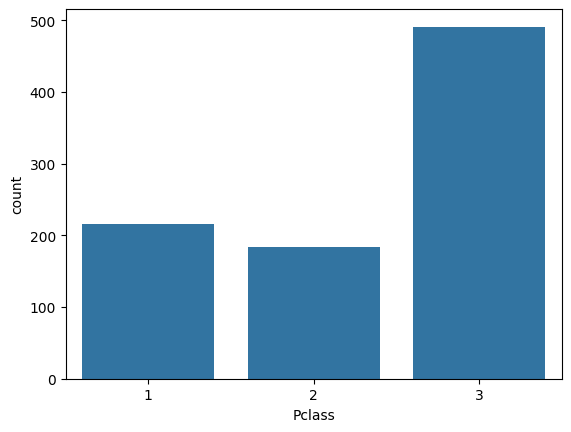

In [28]:
import seaborn as sns
print(df['Pclass'].value_counts())
#sns.countplot(x='Survived', data=df)
sns.countplot(x='Pclass', data=df)

### b. Pies chart

<Axes: ylabel='count'>

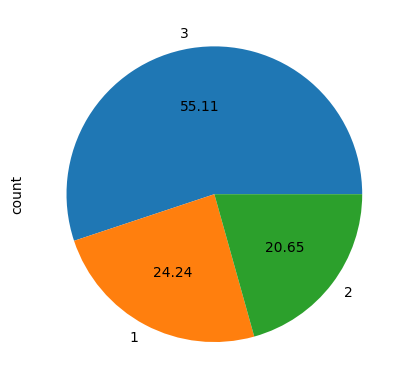

In [30]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%.2f')

### 2. Numerical Data

#### a. Histogram
It is helping us to undertsand the distribution of a column

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

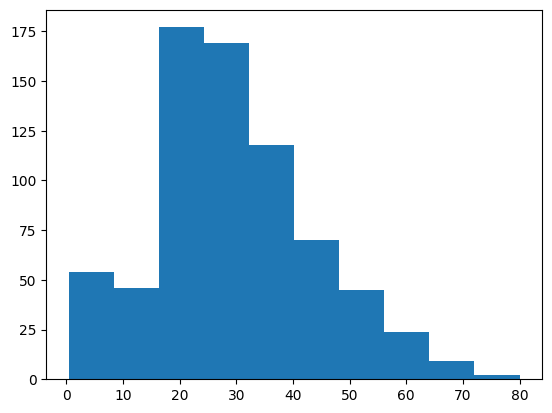

In [33]:
import matplotlib.pyplot as plt
plt.hist(df['Age'],bins=10)

#### b. Displot

It creates a pdf (probability density function)

0.38910778230082704


<ipython-input-43-7029ead482d6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


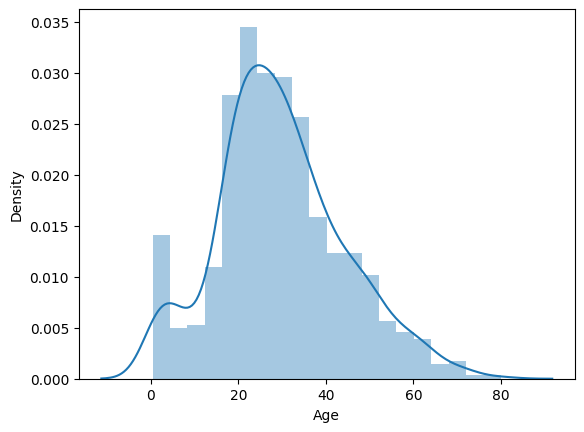

In [43]:
# prompt: genrate distplot using sns on age column
sns.distplot(df['Age'])
print(df['Age'].skew())

It has skew value positive means it is lightly right skewed
It means mean > median > mode.

*   List item
*   List item


for left skew  mean < median < mode.
for perfect data mean=median=mode

#### c. Boxplot

512.3292


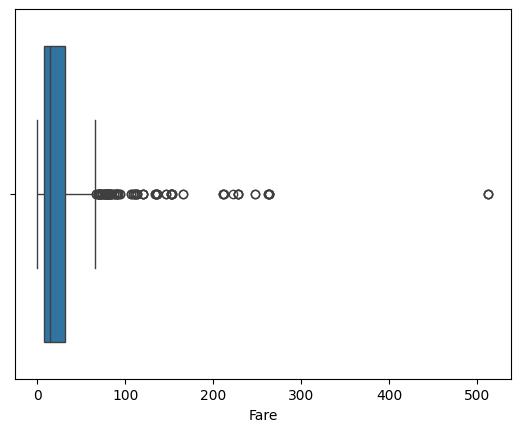

In [42]:
sns.boxplot(x=df['Fare'])
print(df['Fare'].max())

Here so many otliers which are more than 100 , as they are outside the box

## Bivariate analysis
### 1. Scatter plot
It will define relationship between 2 columns
##### a. Numerical numerical

     total_bill   tip     sex smoker   day    time  size
143       27.05  5.00  Female     No  Thur   Lunch     6
18        16.97  3.50  Female     No   Sun  Dinner     3
79        17.29  2.71    Male     No  Thur   Lunch     2
76        17.92  3.08    Male    Yes   Sat  Dinner     2
75        10.51  1.25    Male     No   Sat  Dinner     2


<Axes: xlabel='total_bill', ylabel='tip'>

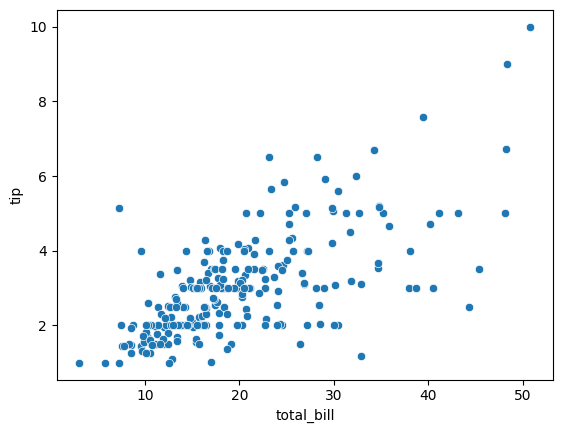

In [45]:
tips = sns.load_dataset('tips')
print(tips.sample(5))
sns.scatterplot(x='total_bill',y='tip',data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

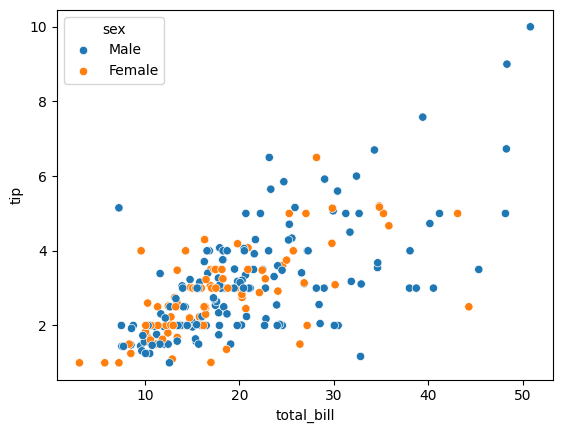

In [46]:
sns.scatterplot(x='total_bill',y='tip',data=tips, hue ='sex')

<Axes: xlabel='total_bill', ylabel='tip'>

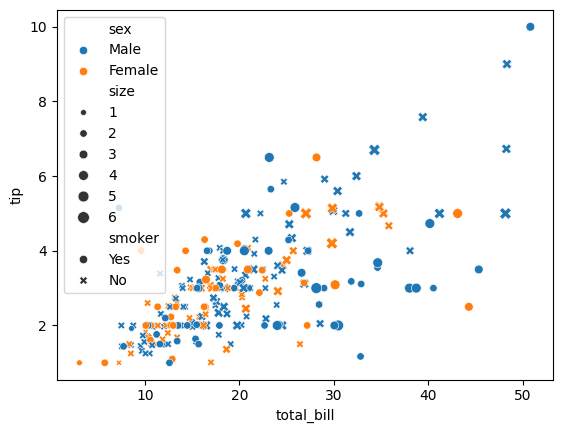

In [48]:
sns.scatterplot(x='total_bill',y='tip',data=tips, hue='sex',style='smoker', size= 'size')

#### 2. Bar plot

<Axes: xlabel='Pclass', ylabel='Fare'>

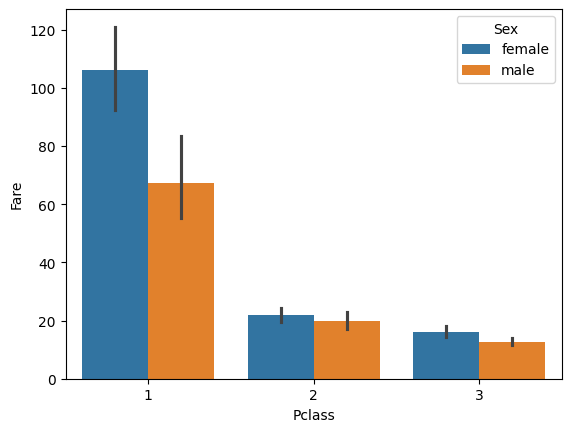

In [50]:
sns.barplot(x='Pclass',y='Fare',hue='Sex',data=df)

It says depending of Pclass rank fare is high means 1st class pasengers gave more fare
Similarly Femare fares are little less than male fares

### 3. Box plot (Categorical numerical)

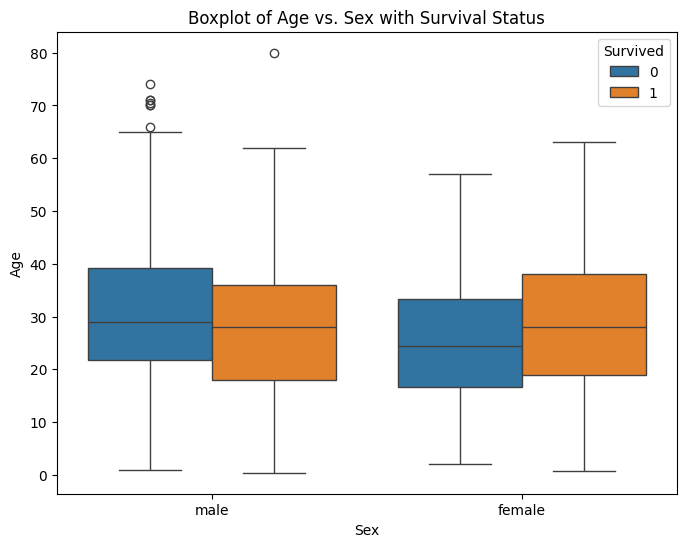

In [51]:
# prompt: boxplot using sns on sex age and survived


# Assuming 'df' is your DataFrame and it's already loaded
# If not, uncomment the next line and replace 'Titanic-Dataset.csv' with your file path
# df = pd.read_csv('Titanic-Dataset.csv')

# Create the boxplot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.boxplot(x='Sex', y='Age', hue='Survived', data=df)
plt.title('Boxplot of Age vs. Sex with Survival Status')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()


Here age is numerical but survived other columns are categorical

### 4. Distplot (categorical numerical)

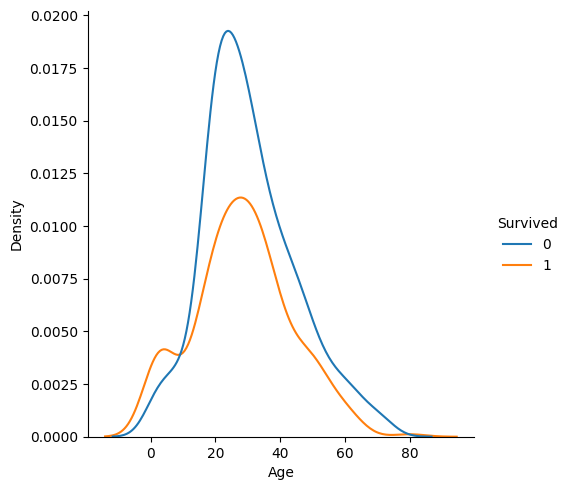

In [54]:
sns.displot(x='Age', hue='Survived', data=df, kind='kde')



*   When age is around 20 to 40 population is high
*   For younger people probability of survive is more than not survive
*   similarly older people  probability of not survive is more than  survive



### 5. Heatmap categorical categorical

<Axes: xlabel='Survived', ylabel='Pclass'>

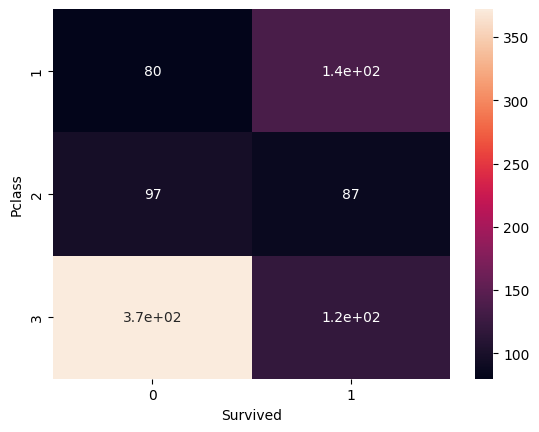

In [57]:
# Create the crosstab
crosstab = pd.crosstab(df['Pclass'], df['Survived'])

# Create the heatmap
sns.heatmap(crosstab, annot=True)


### 6. Pair plot (categorical - Numerical)

     sepal_length  sepal_width  petal_length  petal_width     species
27            5.2          3.5           1.5          0.2      setosa
7             5.0          3.4           1.5          0.2      setosa
26            5.0          3.4           1.6          0.4      setosa
70            5.9          3.2           4.8          1.8  versicolor
113           5.7          2.5           5.0          2.0   virginica


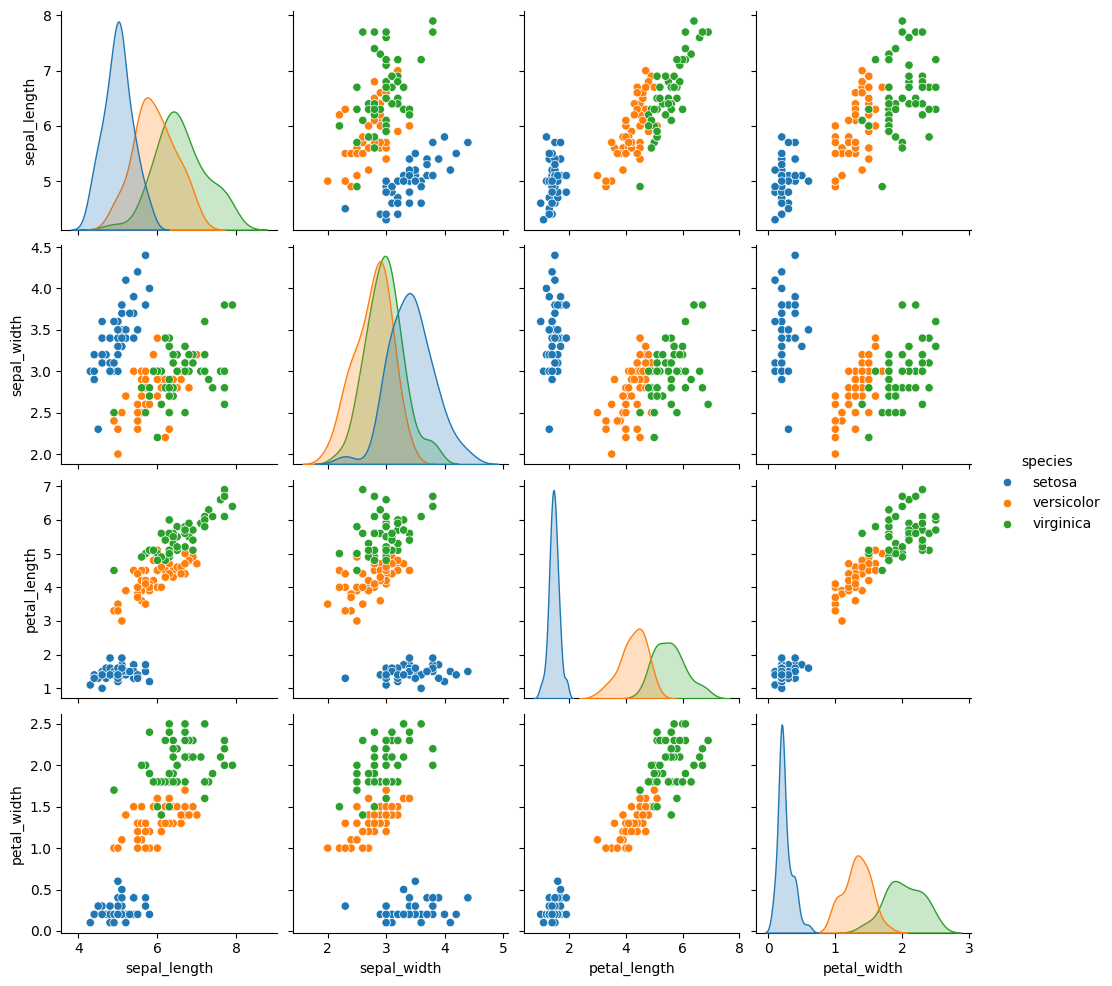

In [59]:
iris = sns.load_dataset('iris')
print(iris.sample(5))
sns.pairplot(iris, hue='species')


### &. Line plot (numerical -numerical)
Its a special case of scatter plot which is time based

In [69]:
flights = sns.load_dataset('flights')
print(flights.sample(5))


     year month  passengers
115  1958   Aug         505
107  1957   Dec         336
133  1960   Feb         391
138  1960   Jul         622
66   1954   Jul         302


    year  passengers
3   1952        2364
7   1956        3939
1   1950        1676
11  1960        5714
9   1958        4572


<Axes: xlabel='year', ylabel='passengers'>

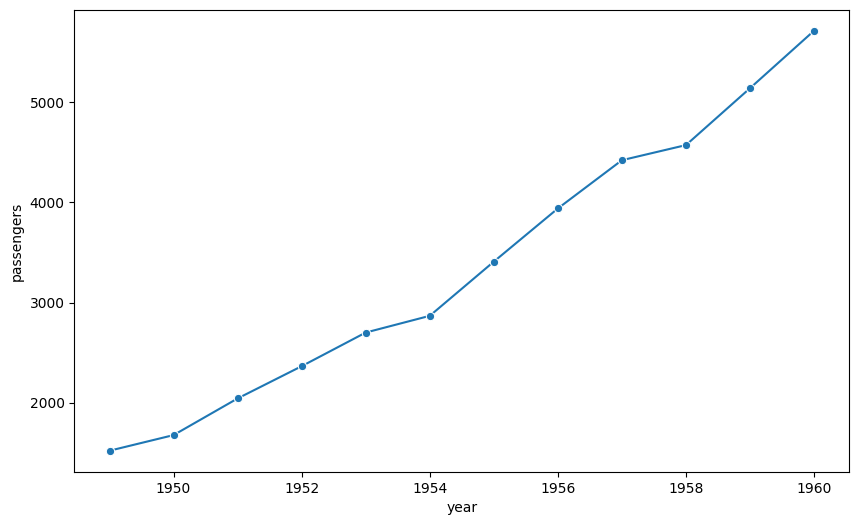

In [80]:
# prompt: group by year

import pandas as pd
# Assuming 'df' is your DataFrame and it has a 'Year' column
# If not, replace 'Year' with the actual column name representing the year

# Convert the 'Year' column to datetime if it's not already
# This is crucial for proper grouping
# df['Year'] = pd.to_datetime(df['Year']).dt.year


grouped_flights = flights.groupby('year')['passengers'].sum().reset_index()
print(grouped_flights.sample(5))
# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='passengers', data=grouped_flights, marker='o')

